# Workplace Safety Analysis

### How can we use machine learning libraries, such as OpenPose, to prevent accidents in the workplace? 

#### This notebook will analyze patterns in three victims' body movements when they are eletrocuted while moving scaffolding.

In [66]:
# Install dependencies
!pip install numpy pandas matplotlib

In [67]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json # for JSON to CSV conversions
import csv 

# Let's load a single JSON file into a pandas dataframe!

In [68]:
# Assign JSON file to variable
json_file = "json/workplace_accident_000000000000_keypoints.json"

# Read JSON file into Pandas Dataframe
with open(json_file) as file:
    data = json.load(file)

# Flatten data    
df = pd.json_normalize(data, "people")

# Remove unwanted columns
df = df.drop({"face_keypoints_2d", "hand_left_keypoints_2d", "hand_right_keypoints_2d",
             "pose_keypoints_3d","face_keypoints_3d","hand_left_keypoints_3d","hand_right_keypoints_3d"}, axis=1)


In [69]:
df

,person_id,pose_keypoints_2d
0,[-1],"[0, 0, 0, 494.266, 280.694, 0.895955, 507.926,..."
1,[-1],"[599.917, 306.061, 0.128728, 611.739, 319.809,..."
2,[-1],"[0, 0, 0, 433.525, 302.233, 0.784662, 443.229,..."


### Maybe it's easier to work with the JSON structure as it currently is.

# Let's combine all JSON files, and capture the coordinates from each person in the video

In [70]:
import glob

In [71]:
# Create variable that points to folder containing JSON files
path = "json/"

person_1 = []
person_2 = []
person_3 = []

# Create variable that points to all files in the folder
files = glob.glob("json/*", recursive=True)

# Sort the files in alphabetical order
files.sort()

# Iterate through each file in the folder and copy each person's datapoints to corresponding arrays
for file in files:
    with open(file) as f:
        json_file = json.load(f)
        if len(json_file["people"]) > 0:
            person_1.append(json_file["people"][0])
        if len(json_file["people"]) > 1:
            person_2.append(json_file["people"][1])
        if len(json_file["people"]) > 2:
            person_3.append(json_file["people"][2])
            

## Now, let's access the coordinates we want to analyze.

In [72]:
# Refresher for Marcia on slicing multidimensional arrays
print("First 3 values in index 0:")
print(person_1[0]["pose_keypoints_2d"][0:3])
print("\nAll values in index 0:")
print(person_1[0]["pose_keypoints_2d"])

First 3 values in index 0:
[0, 0, 0]

All values in index 0:
[0, 0, 0, 494.266, 280.694, 0.895955, 507.926, 278.672, 0.907471, 521.603, 290.531, 0.753311, 519.631, 300.229, 0.220861, 486.341, 284.584, 0.83491, 480.476, 304.066, 0.735135, 480.485, 319.761, 0.493388, 505.921, 319.749, 0.887069, 509.869, 317.842, 0.882608, 515.779, 341.437, 0.818871, 523.525, 366.924, 0.845897, 494.309, 319.802, 0.889498, 498.142, 347.226, 0.812297, 503.987, 368.897, 0.831216, 0, 0, 0, 0, 0, 0, 496.145, 263.057, 0.496121, 488.279, 268.929, 0.587185, 505.929, 372.71, 0.556851, 500.098, 372.732, 0.549622, 505.883, 372.761, 0.744198, 521.667, 370.773, 0.508667, 523.653, 368.842, 0.529409, 523.512, 368.88, 0.767871]


In [73]:
"""
# Use these indexes to get the body part you want (third index includes confidence score):
# Head: 0-3
# Neck: 3-6
# Left shoulder: 6-9
# Left elbow: 9-12
# Left hand: 12-15
# Right shoulder: 15-18
# Right elbow: 18-21
# Right hand: 21-24
# Left hip: 24-27
# Left knee: 27-30
# Left foot: 30-33
# Right hip: 33-36
# Right knee: 36-39
# Right foot: 39-42
"""

# function to populate a person's specific body part keypoints and confidence scores in array
def person_coordinates(person, body_part_keypoints, first_index, last_index):
    """
    Arguments: person should be a single person's set of keypoints.
    Body_part_keypoints should be an empty array of the specific body part you want to retrieve coordinates for.
    """
    for data in range(len(person)):
        head_coordinate = person[data]["pose_keypoints_2d"][first_index:last_index]
        body_part_keypoints.append(head_coordinate)


## What does each person's head movement look like?

In [74]:
# Populate each person's head coordinates in each array
person_1_head = []
person_2_head = []
person_3_head = []

person_coordinates(person_1, person_1_head, 0,2)
person_coordinates(person_2, person_2_head, 0,2)
person_coordinates(person_3, person_3_head, 0,2)

def convert_np_array(regular_list):
    np_array = np.array(regular_list)
    return np_array

In [75]:
def get_x_plotpoints(numpy_body_array): # Get X-axis plot points
    """
    The argument should be a numpy array of X and Y coordinates.
    Retrieve only the X-coordinates in order to plot on a matplotlib graph.
    Return a numpy array of X-coordinates.
    """
    x_coords = numpy_body_array[:,:1]
    return x_coords

def get_y_plotpoints(numpy_body_array): # Get Y-axis plot points
    """
    The argument should be a numpy array of X and Y coordinates.
    Retrieve only the Y-coordinates in order to plot on a matplotlib graph.
    Returns a numpy array of Y-coordinates.
    """
    y_coords = numpy_body_array[:,1:2]
    return y_coords

# Prepare person 1's head data for plotting
p1_head_numpy = convert_np_array(person_1_head)
p1_X_head = get_x_plotpoints(p1_head_numpy);
p1_Y_head = get_y_plotpoints(p1_head_numpy);

# Person 2
p2_head_numpy = convert_np_array(person_2_head)
p2_X_head = get_x_plotpoints(p2_head_numpy);
p2_Y_head = get_y_plotpoints(p2_head_numpy);

# Person 3
p3_head_numpy = convert_np_array(person_3_head)
p3_X_head = get_x_plotpoints(p3_head_numpy);
p3_Y_head = get_y_plotpoints(p3_head_numpy);

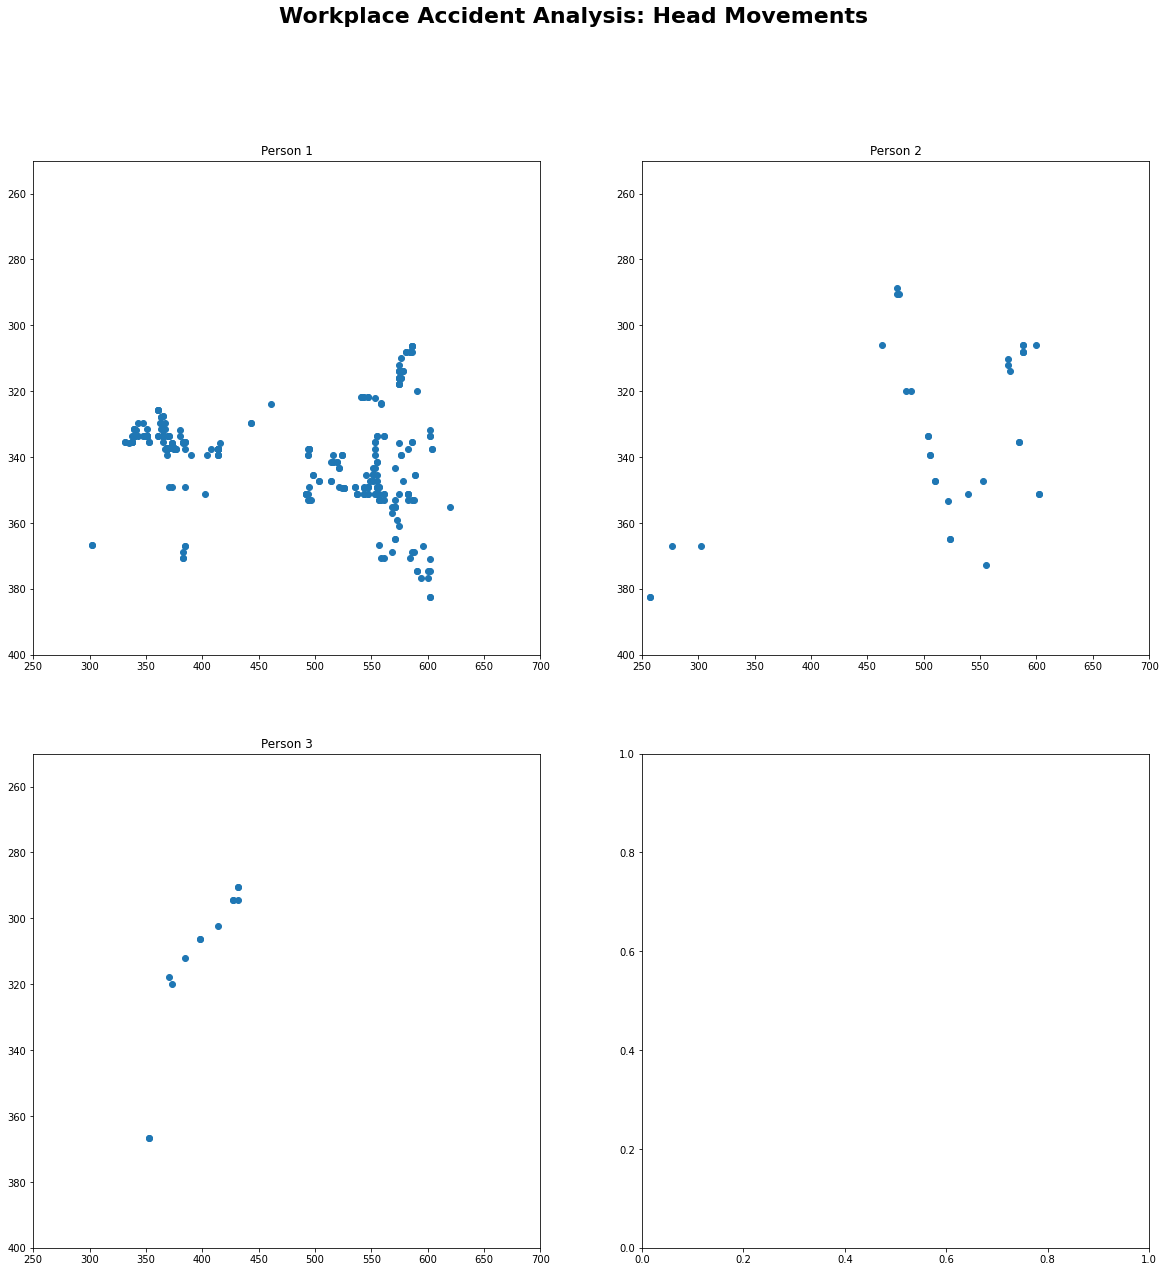

In [76]:
# Create plot
fig,((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(20,20))

# Add data to person 1 plot
scatter = ax0.scatter(x=p1_X_head,
                     y=p1_Y_head)
ax0.set(title="Person 1",
        ylim=(250,400),
        xlim=(250,700)
       );

ax0.invert_yaxis();

# Add data to person 2 plot
scatter = ax1.scatter(x=p2_X_head,
                     y=p2_Y_head)

ax1.set(title="Person 2",
       ylim=(250,400),
       xlim=(250,700)
       );

ax1.invert_yaxis();

scatter = ax2.scatter(x=p3_X_head,
                     y=p3_Y_head)

ax2.set(title="Person 3",
       ylim=(250,400),
       xlim=(250,700)
       );

ax2.invert_yaxis();

# Customize entire plot
fig.suptitle("Workplace Accident Analysis: Head Movements", fontsize=22, fontweight="heavy", va="center");

plt.savefig("head_movements.png")


**Person 1:** Their head movements indicate that they are staying at around the same position in the first half of the video. In the last half of the video, they are moving around the frame more than the other people in the video are, inidicating that perhaps they are trying to get back up or move away from danger (you can see in the video that they try checking on their peer, and then they try getting up but are unable to).

**Person 2 & Person 3:** Their poses are captured during the accident. After they accident, they are laying still, and OpenPose doesn't recognize them as people.


# What does the confidence score for the head keypoints look like?

In [77]:
# Head scores arrays
p1_head_scores = []
p2_head_scores = []
p3_head_scores = []

person_coordinates(person_1, p1_head_scores,2,3)
person_coordinates(person_2, p2_head_scores,2,3)
person_coordinates(person_2, p3_head_scores,2,3)

In [78]:
p1_frame = []
p2_frame = []
p3_frame = []

def label_frame(coordinate_array, frame_array):
    x=0
    for coordinates in coordinate_array:
        frame_array.append(x+1)
        x+=1
        
label_frame(p1_head_scores, p1_frame)
label_frame(p2_head_scores, p2_frame)
label_frame(p3_head_scores, p3_frame)


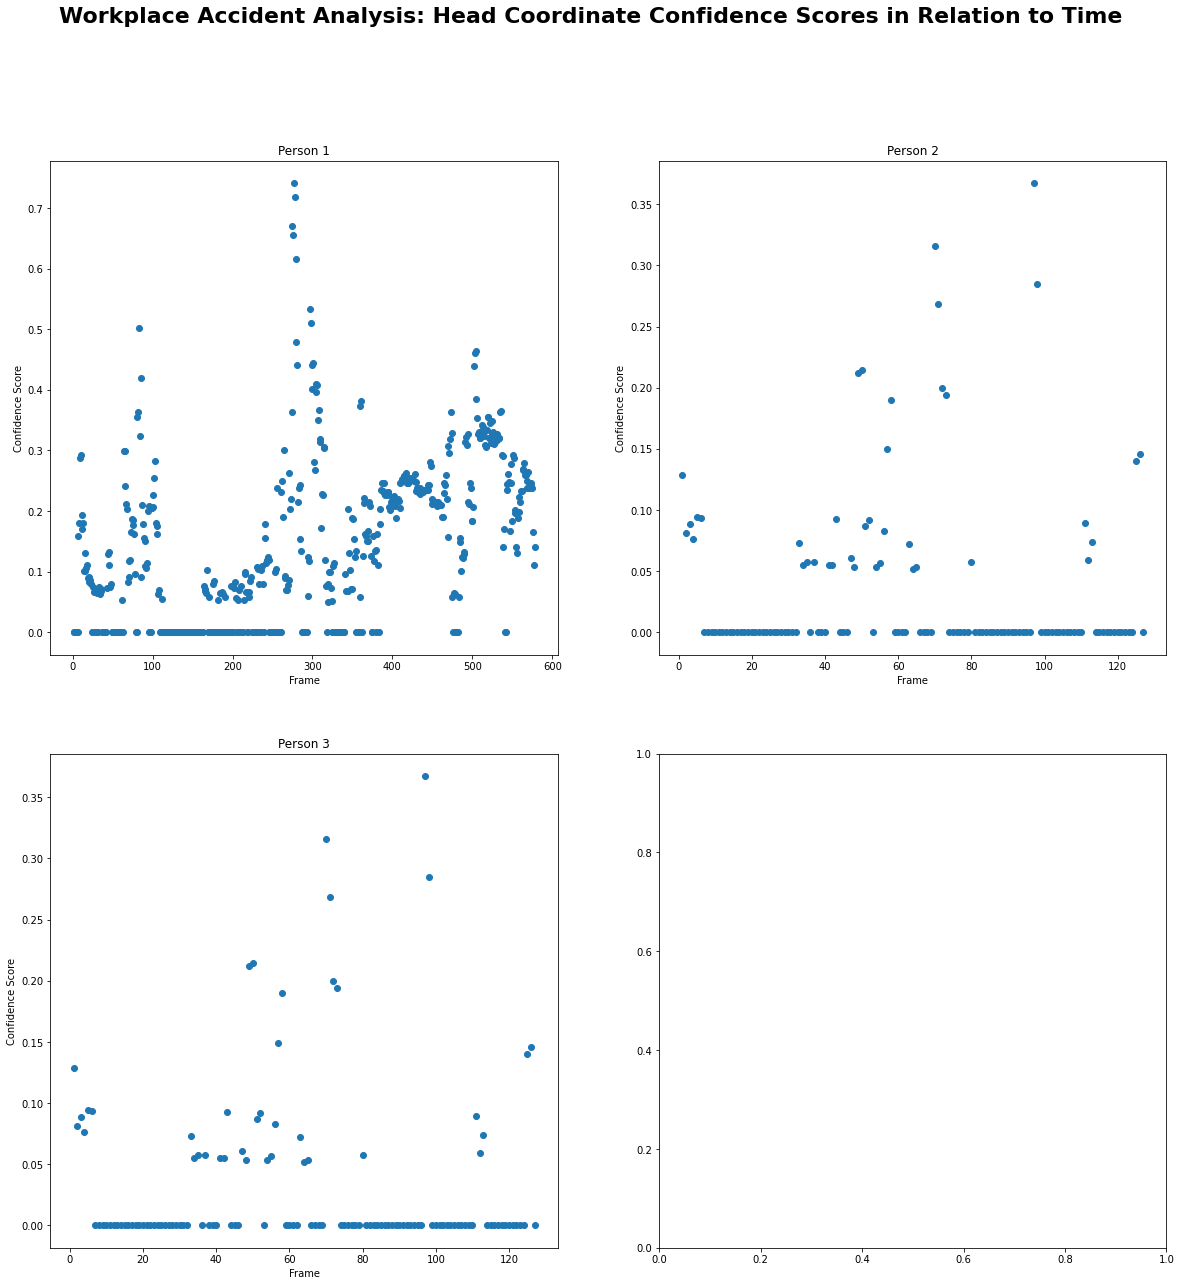

In [79]:
# Create plot
fig,((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(20,20))

# Add data to person 1 plot
scatter = ax0.scatter(x=p1_frame,
                     y=p1_head_scores)

ax0.set(title="Person 1",
       xlabel="Frame",
       ylabel="Confidence Score");


# Add data to person 2 plot
scatter = ax1.scatter(x=p2_frame,
                     y=p2_head_scores)

ax1.set(title="Person 2",
       xlabel="Frame",
       ylabel="Confidence Score");

# Add data to person 3 plot
scatter = ax2.scatter(x=p3_frame,
                     y=p3_head_scores)

ax2.set(title="Person 3",
       xlabel="Frame",
       ylabel="Confidence Score");

# Customize entire plot
fig.suptitle("Workplace Accident Analysis: Head Coordinate Confidence Scores in Relation to Time", 
             fontsize=22, fontweight="heavy", va="center");

# Save the plot above
plt.savefig("confidence_scores.png", );

**Person 1**: The head confidence score is highest at 3 approximate frames: 85, 300, 505. At all these points, the accident has already occurred, and all 3 people are on the ground. At about fram 85, the score is about 50%. At about frame 300, the score is highest for person 1 goes to about 75% confidence. At frame 505, the score is above 45%. 

**Person 2**: The head confidence score mostly stays in around 5-10% range.

**Person 3**: The head confidence score mostly stays in around the 5-10% range.

# Head Coordinates in Relation to Hip Coordinates

In [80]:
# Retrieve pelvis Coordinates for each person
person_1_righthip = []
person_2_righthip = []
person_3_righthip = []

person_coordinates(person_1, person_1_righthip,33,35)
person_coordinates(person_2, person_2_righthip,33,35)
person_coordinates(person_3, person_3_righthip,33,35)

person_1_lefthip = []
person_2_lefthip = []
person_3_lefthip = []

person_coordinates(person_1, person_1_lefthip,24,26)
person_coordinates(person_2, person_2_lefthip,24,26)
person_coordinates(person_3, person_3_lefthip,24,26)

In [81]:
# Convert lists to numpy arrays
p1_numpy_righthip = convert_np_array(person_1_righthip);
p2_numpy_righthip = convert_np_array(person_2_righthip);
p3_numpy_righthip = convert_np_array(person_3_righthip);

p1_numpy_lefthip = convert_np_array(person_1_lefthip);
p2_numpy_lefthip = convert_np_array(person_2_lefthip);
p3_numpy_lefthip = convert_np_array(person_3_lefthip);

# Split arrays into x and y coordinates
# Right hip coordinates
p1_x_righthip = get_x_plotpoints(p1_numpy_righthip);
p1_y_righthip = get_y_plotpoints(p1_numpy_righthip);

p2_x_righthip = get_x_plotpoints(p2_numpy_righthip);
p2_y_righthip = get_y_plotpoints(p2_numpy_righthip);

p3_x_righthip = get_x_plotpoints(p3_numpy_righthip);
p3_y_righthip = get_y_plotpoints(p3_numpy_righthip);

# Left hip coordinates
p1_x_lefthip = get_x_plotpoints(p1_numpy_lefthip);
p1_y_lefthip = get_y_plotpoints(p1_numpy_lefthip);

p2_x_lefthip = get_x_plotpoints(p2_numpy_lefthip);
p2_y_lefthip = get_y_plotpoints(p2_numpy_lefthip);

p3_x_kefthip = get_x_plotpoints(p3_numpy_lefthip);
p3_y_lefthip = get_y_plotpoints(p3_numpy_lefthip);

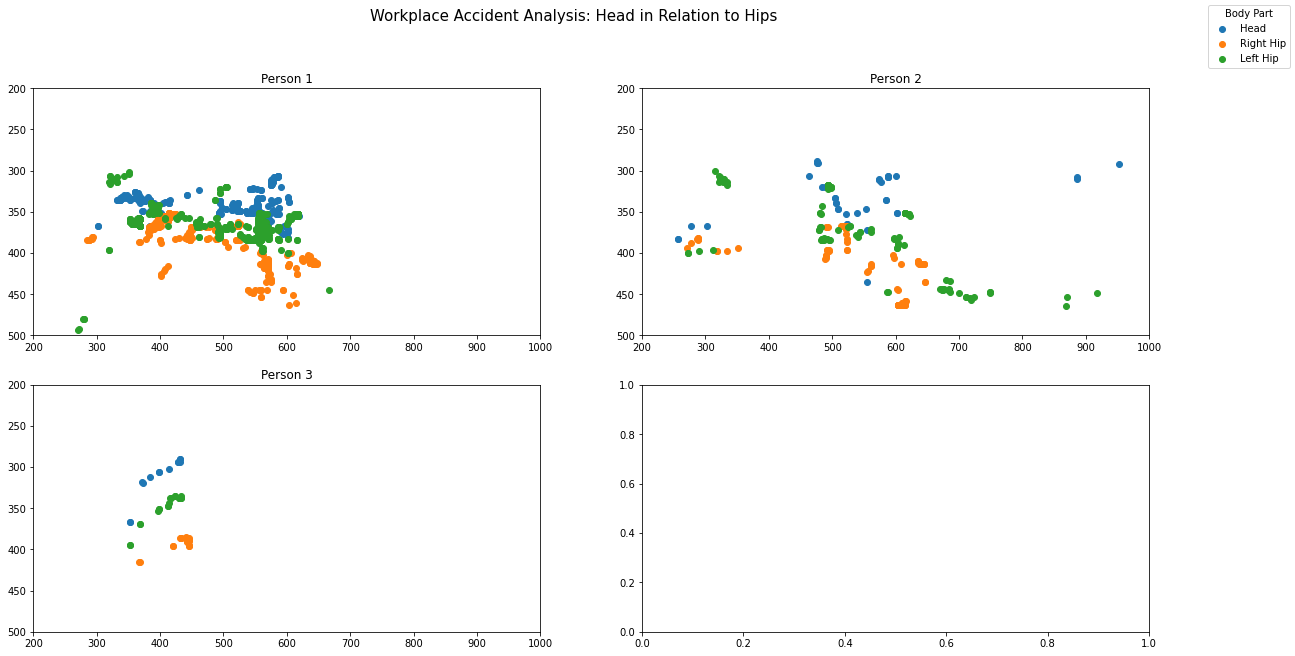

In [82]:
# Create plot
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(20,10))

# Add data to person 1 plot
scatter = ax0.scatter(x=p1_X_head,
                       y=p1_Y_head
                       )

scatter = ax0.scatter(x=p1_x_righthip,
                     y=p1_y_righthip
                     )

scatter = ax0.scatter(x=p1_x_lefthip,
                     y=p1_y_lefthip)

ax0.set(title="Person 1",
        ylim=(200,500),
        xlim=(200,1000),
       );

# Invert y-axis 
ax0.invert_yaxis();

# Add data to person 2 plot
scatter = ax1.scatter(x=p2_X_head,
                     y=p2_Y_head
                     )

scatter = ax1.scatter(x=p2_x_righthip,
                     y=p2_y_righthip
                     )

scatter = ax1.scatter(x=p2_x_lefthip,
                     y=p2_y_lefthip
                     )
ax1.set(title="Person 2",
       ylim=(200,500),
       xlim=(200,1000))

ax1.invert_yaxis();

# Add data to person 3 plot
scatter = ax2.scatter(x=p3_X_head,
                     y=p3_Y_head
                     )

scatter = ax2.scatter(x=p3_x_righthip,
                     y=p3_y_righthip
                     )

scatter = ax2.scatter(x=p3_x_kefthip,
                     y=p3_y_lefthip
                     )

ax2.set(title="Person 3",
       ylim=(200,500),
       xlim=(200,1000))

ax2.invert_yaxis();
# Customize entire plot
fig.suptitle("Workplace Accident Analysis: Head in Relation to Hips", 
             fontsize=15, va="center");

# Add a legend
fig.legend(title="Body Part", labels=["Head","Right Hip","Left Hip"]);

plt.savefig("head_hip_movements.png")

**Person 1:** You can see that generally, the head coordinates are the highest, followed by the left hip, and the right hip. The head coordinates are at around the same place as the hip coordinates from frames 500-600, indicating that the person was laying flat. 

**Person 2:** There are coordinates that have clearly been switched with someone else's coordinates (such as left hip coordinates at 350,300). At around frames 500-650, there is movement, indicating the person is trying to get up, or at least regain their senses.

**Person 3:** There is an upward movement in their head and hip coordinates.

# Center of Mass

In [83]:
def center_of_mass(x_numpy, y_numpy):
    x_mass = (x_numpy/len(x_numpy))
    y_mass = (y_numpy/len(y_numpy))

# Can also take sturnam (shoulders) and hips coordinates, and calculate center of mass using those coordinates
# Then plot and look for shifts in coordinates

# Let's look at vertical movements of the head across time

In [84]:
# Reset person 3 frame array
p3_frame = []

label_frame(p3_Y_head, p3_frame)

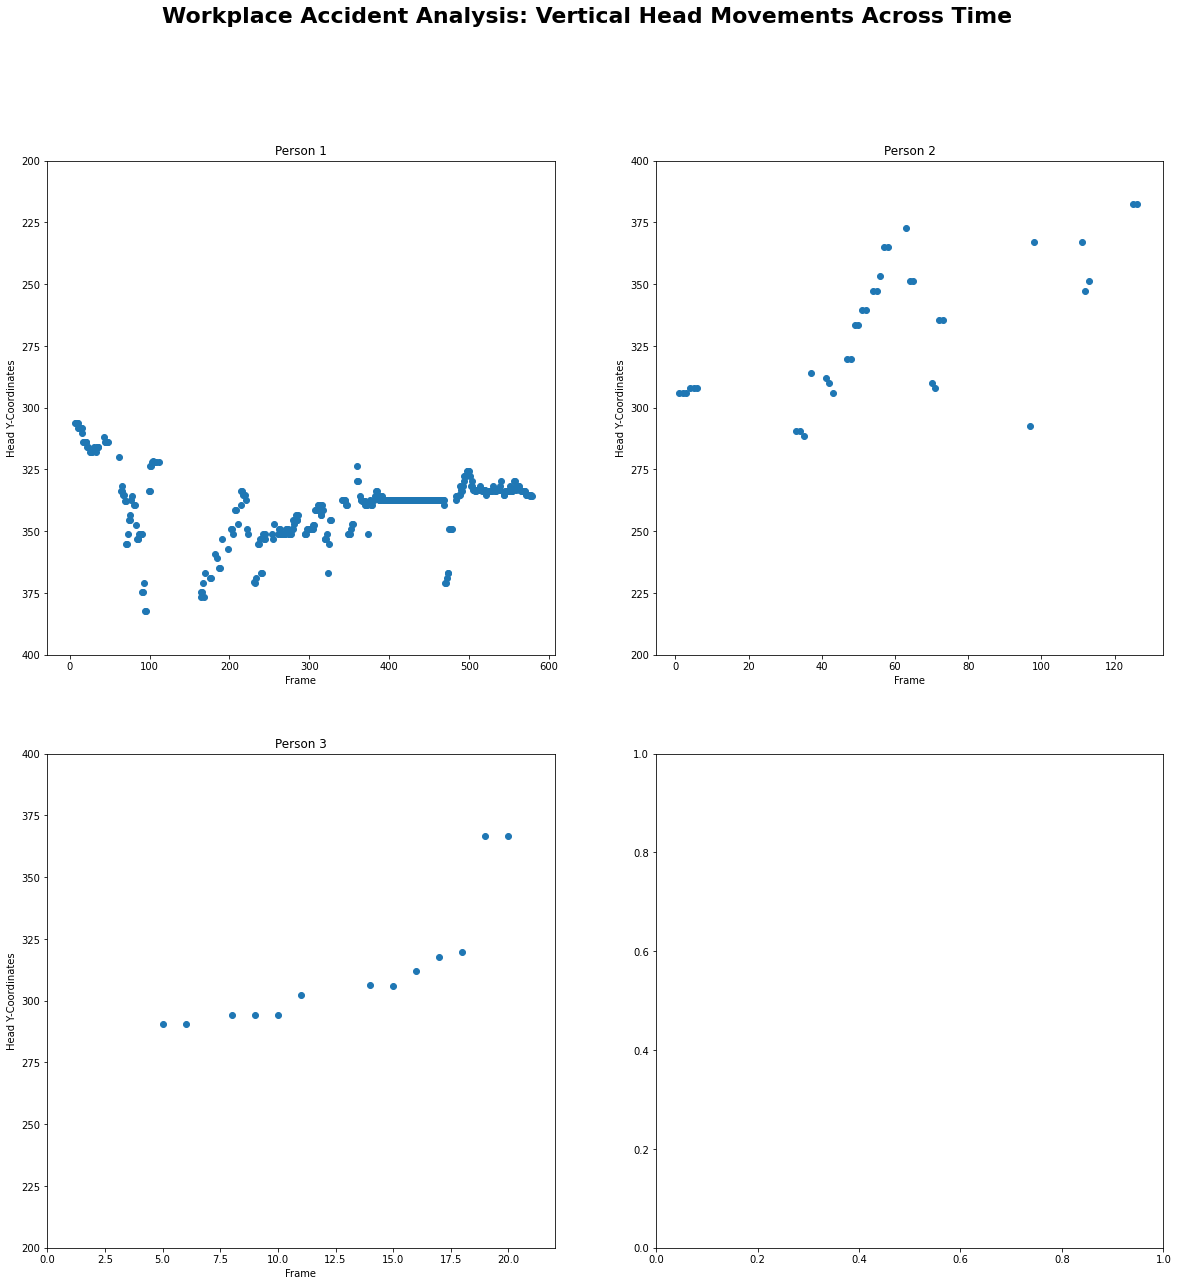

In [85]:
# Create plot
fig,((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(20,20))

# Add data to person 1 plot
scatter = ax0.scatter(x=p1_frame,
                     y=p1_Y_head)

ax0.set(title="Person 1",
       xlabel="Frame",
       ylabel="Head Y-Coordinates",
       ylim=(200,400));

ax0.invert_yaxis();


# Add data to person 2 plot
scatter = ax1.scatter(x=p2_frame,
                     y=p2_Y_head)

ax1.set(title="Person 2",
       xlabel="Frame",
       ylabel="Head Y-Coordinates",
       ylim=(400,200));

ax1.invert_yaxis();

# Add data to person 3 plot
scatter = ax2.scatter(x=p3_frame,
                     y=p3_Y_head)

ax2.set(title="Person 3",
       xlabel="Frame",
       ylabel="Head Y-Coordinates",
       ylim=(400,200));

ax2.invert_yaxis();

# Customize entire plot
fig.suptitle("Workplace Accident Analysis: Vertical Head Movements Across Time", 
             fontsize=22, fontweight="heavy", va="center");

# Save the plot above
plt.savefig("head_y_coords_over_time.png");

**Person 1:** The downward and then upward movements in their head indicates they are able to move, but are likely struggling to regain their posture. From frames 400-600, they seemed to have regained their posture and are in a resting state (with small head movements).

**Person 2:** Their vertical head movements look like a mountain range. This could indicate that they tried getting up a few times, but were unable to.

**Person 3:** There are few head coordinates for this person, but they coordinates remain relatively steady, with an upward movement. In the actual video, they don't move much after the accident, and remain in a fetal position.

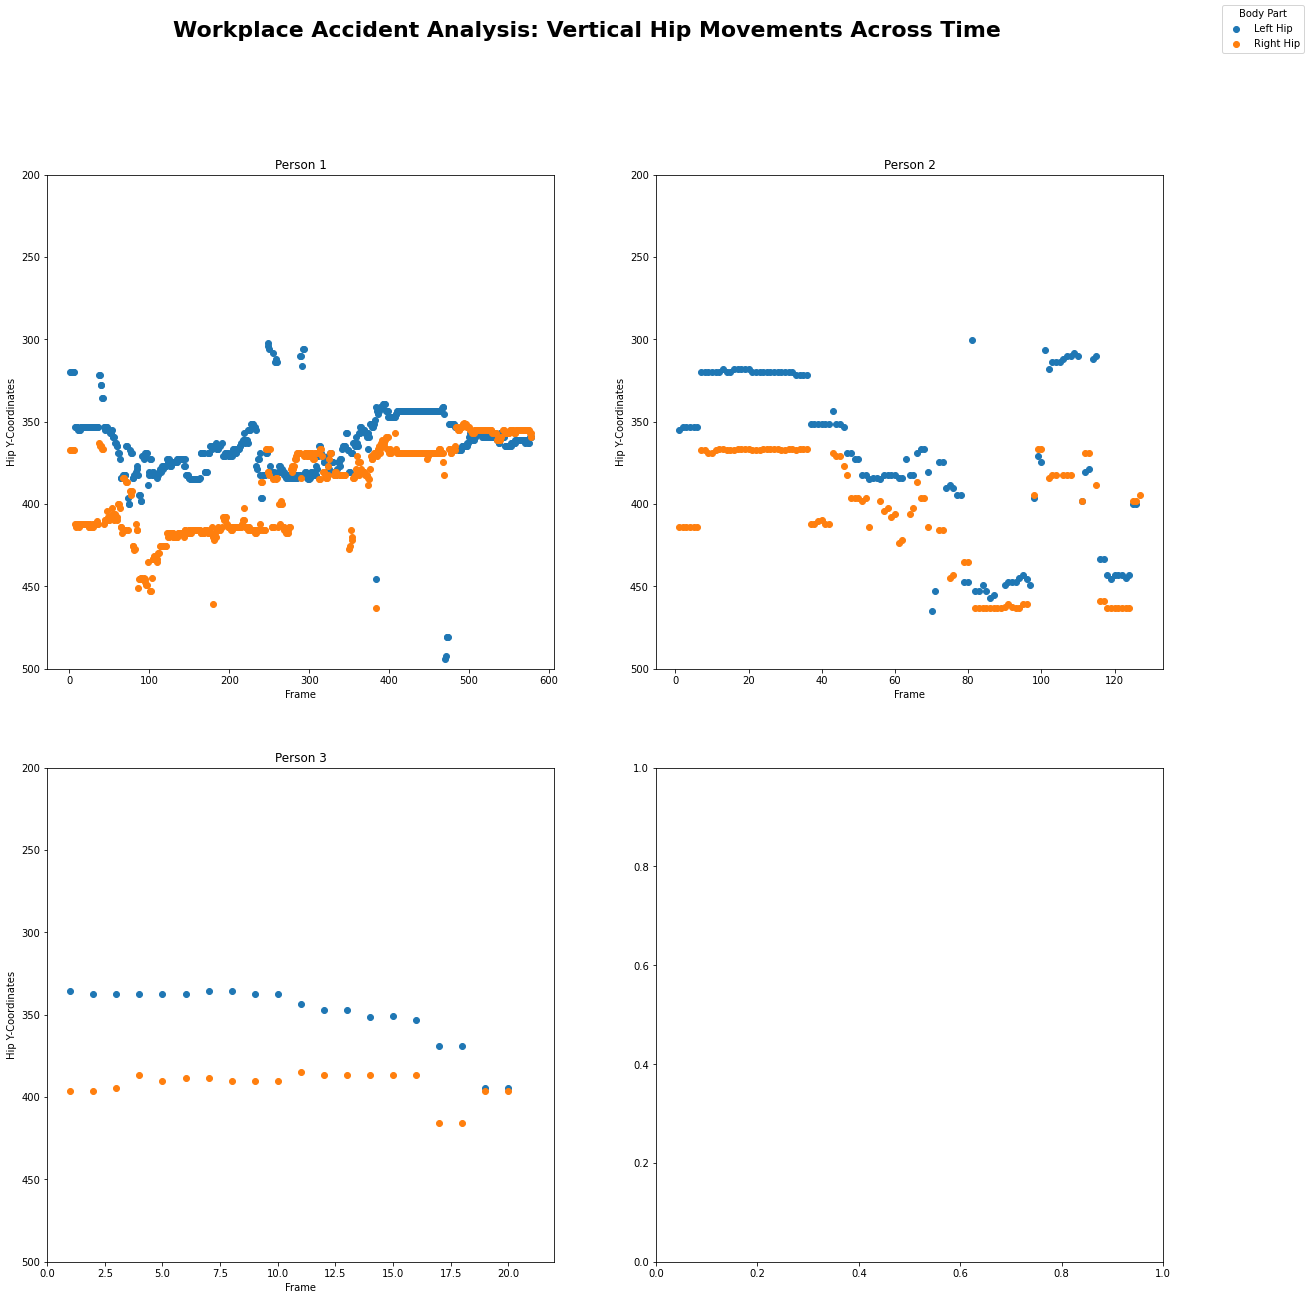

In [86]:
# Create plot
fig,((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(20,20))

# Add data to person 1 plot
# Left hip
scatter = ax0.scatter(x=p1_frame,
                     y=p1_y_lefthip)
# Right hip
scatter = ax0.scatter(x=p1_frame,
                      y=p1_y_righthip)

ax0.set(title="Person 1",
       xlabel="Frame",
       ylabel="Hip Y-Coordinates",
       ylim=(500,200)
       );


# Add data to person 2 plot
# Left hip
scatter = ax1.scatter(x=p2_frame,
                     y=p2_y_lefthip)
# Right hip
scatter = ax1.scatter(x=p2_frame,
                     y=p2_y_righthip)

ax1.set(title="Person 2",
       xlabel="Frame",
       ylabel="Hip Y-Coordinates",
       ylim=(500,200)
       );

# Add data to person 3 plot
# Left hip
scatter = ax2.scatter(x=p3_frame,
                     y=p3_y_lefthip)
# Right hip
scatter = ax2.scatter(x=p3_frame,
                     y=p3_y_righthip)

ax2.set(title="Person 3",
       xlabel="Frame",
       ylabel="Hip Y-Coordinates",
       ylim=(500,200)
       );

# Add a legend
fig.legend(title="Body Part", labels=["Left Hip","Right Hip"]);

# Customize entire plot
fig.suptitle("Workplace Accident Analysis: Vertical Hip Movements Across Time", 
             fontsize=22, fontweight="heavy", va="center");

# Save the plot above
plt.savefig("hip_y_coords_over_time.png");

**Person 1:** The left and right hip coordinates exhibit the same movement throughout the video. At the beginning of the video, when the accident happens, the coordinates have the same shape. From the middle to the end of the video, the coordinates get closer, signaling the person is getting up (and their hips are at about the same y-axis coordinate).

**Person 2:** The left and right hip coordinates are generally exhibiting the same movement. They start getting closer toward the middle of the video. The left hip coordinates jump at around frame 95, likely meaning the coordinates have been switched with someone else's coordinates.

**Person 3:** This person is prone the entire time. By the end of frame 17.5, they are standing up straight as their last 2 y-coordinates are both at around coordinate 400.